In [152]:
!pip install mlxtend
!pip install -U scikit-learn
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

In [153]:
Trained_Data = pd.read_csv(r'C:\Users\Eng Sacad\Desktop\IDS\Trained_data.csv')
Tested_Data = pd.read_csv(r'C:\Users\Eng Sacad\Desktop\IDS\Tested_data.csv')

In [154]:
Trained_Data

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,25188,0,tcp,exec,RSTO,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
20151,25189,0,tcp,ftp_data,SF,334,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
20152,25190,0,tcp,private,REJ,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
20153,25191,0,tcp,nnsp,S0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [155]:
Tested_Data

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,7,0,tcp,private,S0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
1,8,0,tcp,private,S0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
2,16,0,tcp,netbios_ns,S0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
3,19,0,tcp,http,SF,233,616,0,0,0,...,255,1.00,0.00,0.02,0.03,0.0,0.0,0.02,0.0,normal
4,25,0,tcp,mtp,S0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,25169,0,tcp,http,SF,252,6160,0,0,0,...,255,1.00,0.00,0.33,0.04,0.0,0.0,0.00,0.0,normal
5033,25170,0,udp,private,SF,105,146,0,0,0,...,84,0.87,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
5034,25177,0,tcp,ftp_data,SF,748,0,0,0,0,...,27,0.12,0.07,0.12,0.07,0.0,0.0,0.00,0.0,normal
5035,25180,0,tcp,private,S0,0,0,0,0,0,...,13,0.05,0.09,0.00,0.00,1.0,1.0,0.00,0.0,anomaly


In [156]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20155 entries, 0 to 20154
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   20155 non-null  int64  
 1   duration                     20155 non-null  int64  
 2   protocol_type                20155 non-null  object 
 3   service                      20155 non-null  object 
 4   flag                         20155 non-null  object 
 5   src_bytes                    20155 non-null  int64  
 6   dst_bytes                    20155 non-null  int64  
 7   land                         20155 non-null  int64  
 8   wrong_fragment               20155 non-null  int64  
 9   urgent                       20155 non-null  int64  
 10  hot                          20155 non-null  int64  
 11  num_failed_logins            20155 non-null  int64  
 12  logged_in                    20155 non-null  int64  
 13  num_compromised 

In [157]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5037 non-null   int64  
 1   duration                     5037 non-null   int64  
 2   protocol_type                5037 non-null   object 
 3   service                      5037 non-null   object 
 4   flag                         5037 non-null   object 
 5   src_bytes                    5037 non-null   int64  
 6   dst_bytes                    5037 non-null   int64  
 7   land                         5037 non-null   int64  
 8   wrong_fragment               5037 non-null   int64  
 9   urgent                       5037 non-null   int64  
 10  hot                          5037 non-null   int64  
 11  num_failed_logins            5037 non-null   int64  
 12  logged_in                    5037 non-null   int64  
 13  num_compromised   

In [158]:
Trained_Data.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,20155.000000,20155.000000,2.015500e+04,2.015500e+04,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,...,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000,20155.000000
mean,12624.221037,302.682312,2.854427e+04,3.458971e+03,0.000099,0.022724,0.000050,0.201092,0.001092,0.397519,...,182.325527,115.745076,0.522207,0.081595,0.147185,0.031991,0.286604,0.280619,0.115972,0.116880
std,7271.527949,2702.781364,2.694335e+06,8.494178e+04,0.009961,0.253935,0.007044,2.181048,0.043408,0.489397,...,99.150438,110.760328,0.448747,0.185996,0.307644,0.112116,0.445562,0.446409,0.303524,0.315021
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6342.500000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12652.000000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18909.000000,0.000000,2.810000e+02,5.460000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,25192.000000,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
Tested_Data.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,5037.000000,5037.000000,5.037000e+03,5.037000e+03,5037.0,5037.000000,5037.0,5037.000000,5037.000000,5037.000000,...,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,12485.577328,314.544570,7.470210e+03,3.623399e+03,0.0,0.027794,0.0,0.185825,0.001588,0.383760,...,183.358547,112.333929,0.510121,0.086315,0.148523,0.031257,0.282583,0.276756,0.125116,0.126329
std,7275.795170,2620.867143,1.417110e+05,1.029415e+05,0.0,0.283974,0.0,2.043416,0.052702,0.486349,...,98.370469,110.160323,0.449645,0.191872,0.311271,0.104188,0.444362,0.444768,0.315004,0.326346
min,7.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6146.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,88.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12372.000000,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,255.000000,56.000000,0.430000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18828.000000,0.000000,2.680000e+02,4.920000e+02,0.0,0.000000,0.0,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000
max,25186.000000,42636.000000,5.133876e+06,5.150836e+06,0.0,3.000000,0.0,30.000000,3.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
Trained_Data.nunique()

Unnamed: 0                     20155
duration                         605
protocol_type                      3
service                           66
flag                              11
src_bytes                       1485
dst_bytes                       3421
land                               2
wrong_fragment                     3
urgent                             2
hot                               22
num_failed_logins                  4
logged_in                          2
num_compromised                   21
root_shell                         2
su_attempted                       3
num_root                          22
num_file_creations                17
num_shells                         2
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            442
srv_count                        394
serror_rate                       67
srv_serror_rate                   53
r

In [161]:
Trained_Data.max()

Unnamed: 0                         25192
duration                           42862
protocol_type                        udp
service                            whois
flag                                  SH
src_bytes                      381709090
dst_bytes                        5151385
land                                   1
wrong_fragment                         3
urgent                                 1
hot                                   77
num_failed_logins                      4
logged_in                              1
num_compromised                      884
root_shell                             1
su_attempted                           2
num_root                             975
num_file_creations                    40
num_shells                             1
num_access_files                       8
num_outbound_cmds                      0
is_host_login                          0
is_guest_login                         1
count                                511
srv_count       

In [162]:
Tested_Data.max()

Unnamed: 0                       25186
duration                         42636
protocol_type                      udp
service                          whois
flag                                SH
src_bytes                      5133876
dst_bytes                      5150836
land                                 0
wrong_fragment                       3
urgent                               0
hot                                 30
num_failed_logins                    3
logged_in                            1
num_compromised                    789
root_shell                           1
su_attempted                         2
num_root                           867
num_file_creations                  20
num_shells                           0
num_access_files                     2
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       1
count                              511
srv_count                          511
serror_rate              

In [163]:
Results = set(Trained_Data['class'].values)
print(Results,end=" ")

{'anomaly', 'normal'} 

In [164]:
Results = set(Tested_Data['class'].values)
print(Results,end=" ")

{'anomaly', 'normal'} 

In [165]:
Trained_attack = Trained_Data['class'].map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data['class'].map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [166]:
Trained_Data.head(10)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,attack_state
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,2,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,3,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
3,4,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,5,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
5,6,0,tcp,private,REJ,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,1
6,9,0,tcp,remote_job,S0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
7,10,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
8,11,0,tcp,private,REJ,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,1
9,12,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1


In [167]:
Tested_Data.head(10)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,attack_state
0,7,0,tcp,private,S0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.0,1.0,0.00,0.00,anomaly,1
1,8,0,tcp,private,S0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.0,1.0,0.00,0.00,anomaly,1
2,16,0,tcp,netbios_ns,S0,0,0,0,0,0,...,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.00,anomaly,1
3,19,0,tcp,http,SF,233,616,0,0,0,...,1.00,0.00,0.02,0.03,0.0,0.0,0.02,0.00,normal,0
4,25,0,tcp,mtp,S0,0,0,0,0,0,...,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.00,anomaly,1
5,27,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.0,1.0,0.00,0.00,anomaly,1
6,28,0,tcp,http,SF,227,6588,0,0,0,...,1.00,0.00,0.02,0.14,0.0,0.0,0.56,0.57,normal,0
7,35,0,udp,domain_u,SF,45,45,0,0,0,...,0.98,0.01,0.00,0.00,0.0,0.0,0.00,0.00,normal,0
8,44,9052,udp,other,SF,146,105,0,0,0,...,0.01,0.66,0.99,0.00,0.0,0.0,0.00,0.00,normal,0
9,45,0,tcp,http,SF,290,3006,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,normal,0


In [168]:
Trained_Data.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [169]:
Tested_Data.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [170]:
Trained_Data.duplicated().sum()

0

In [171]:
Tested_Data.duplicated().sum()

0

In [172]:
Trained_Data.shape

(20155, 44)

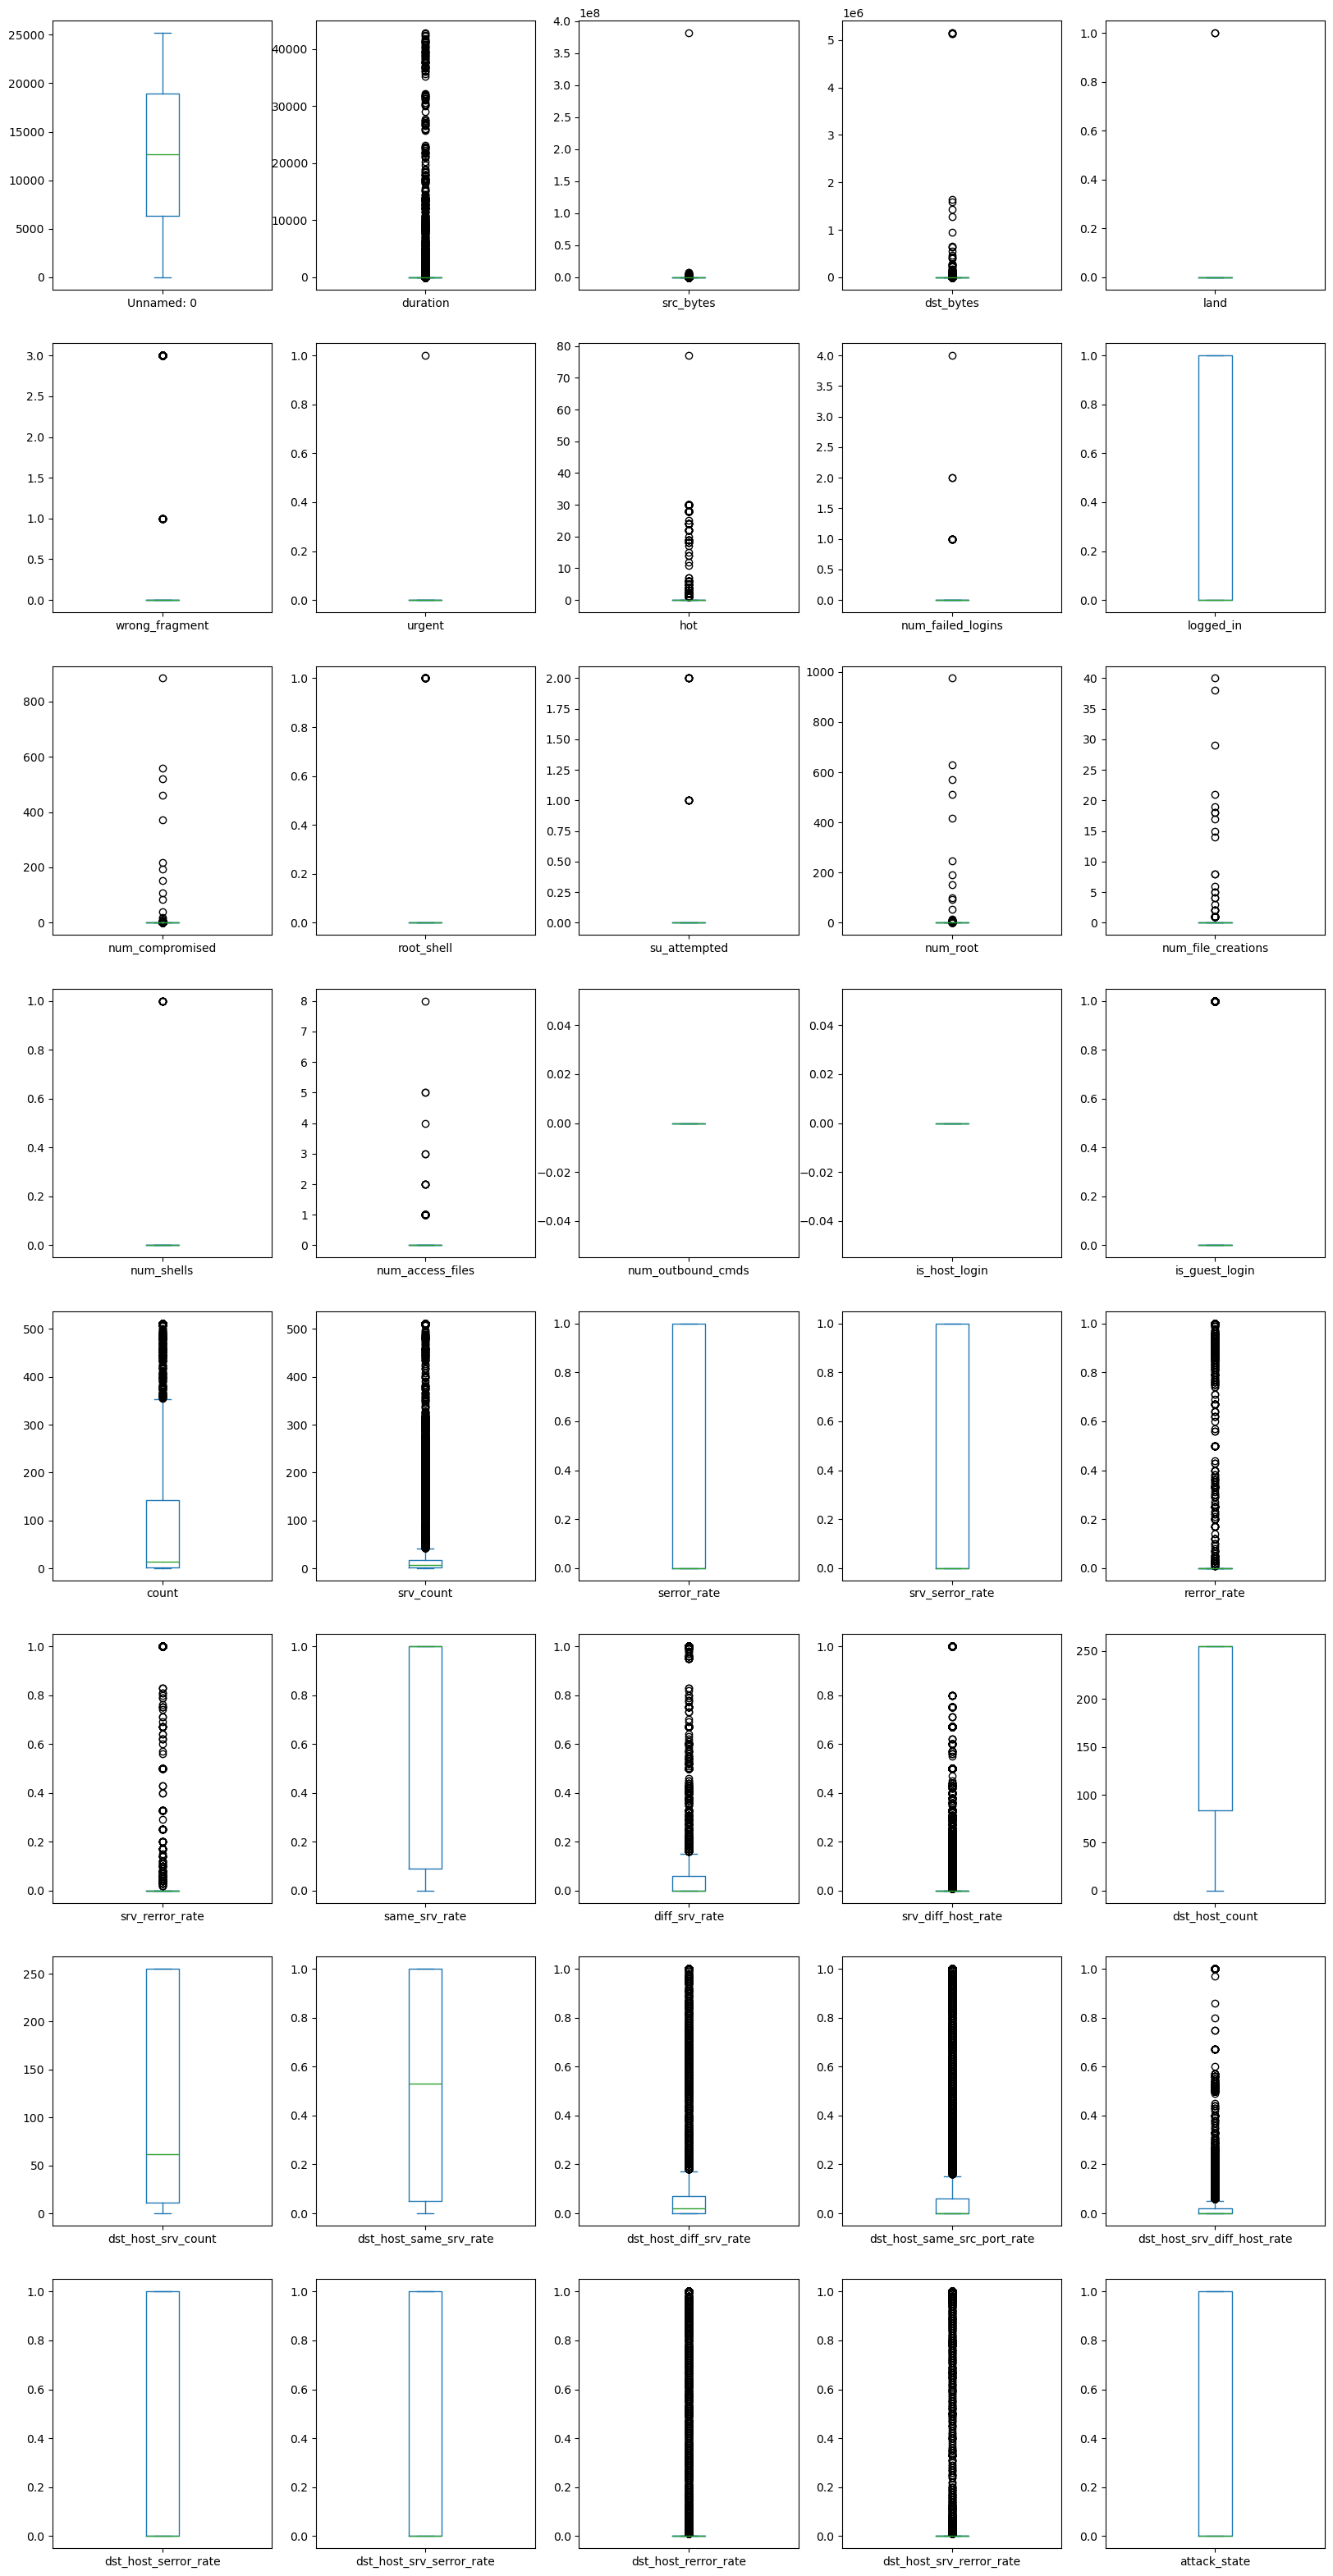

In [173]:
Trained_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [174]:
Tested_Data.shape

(5037, 44)

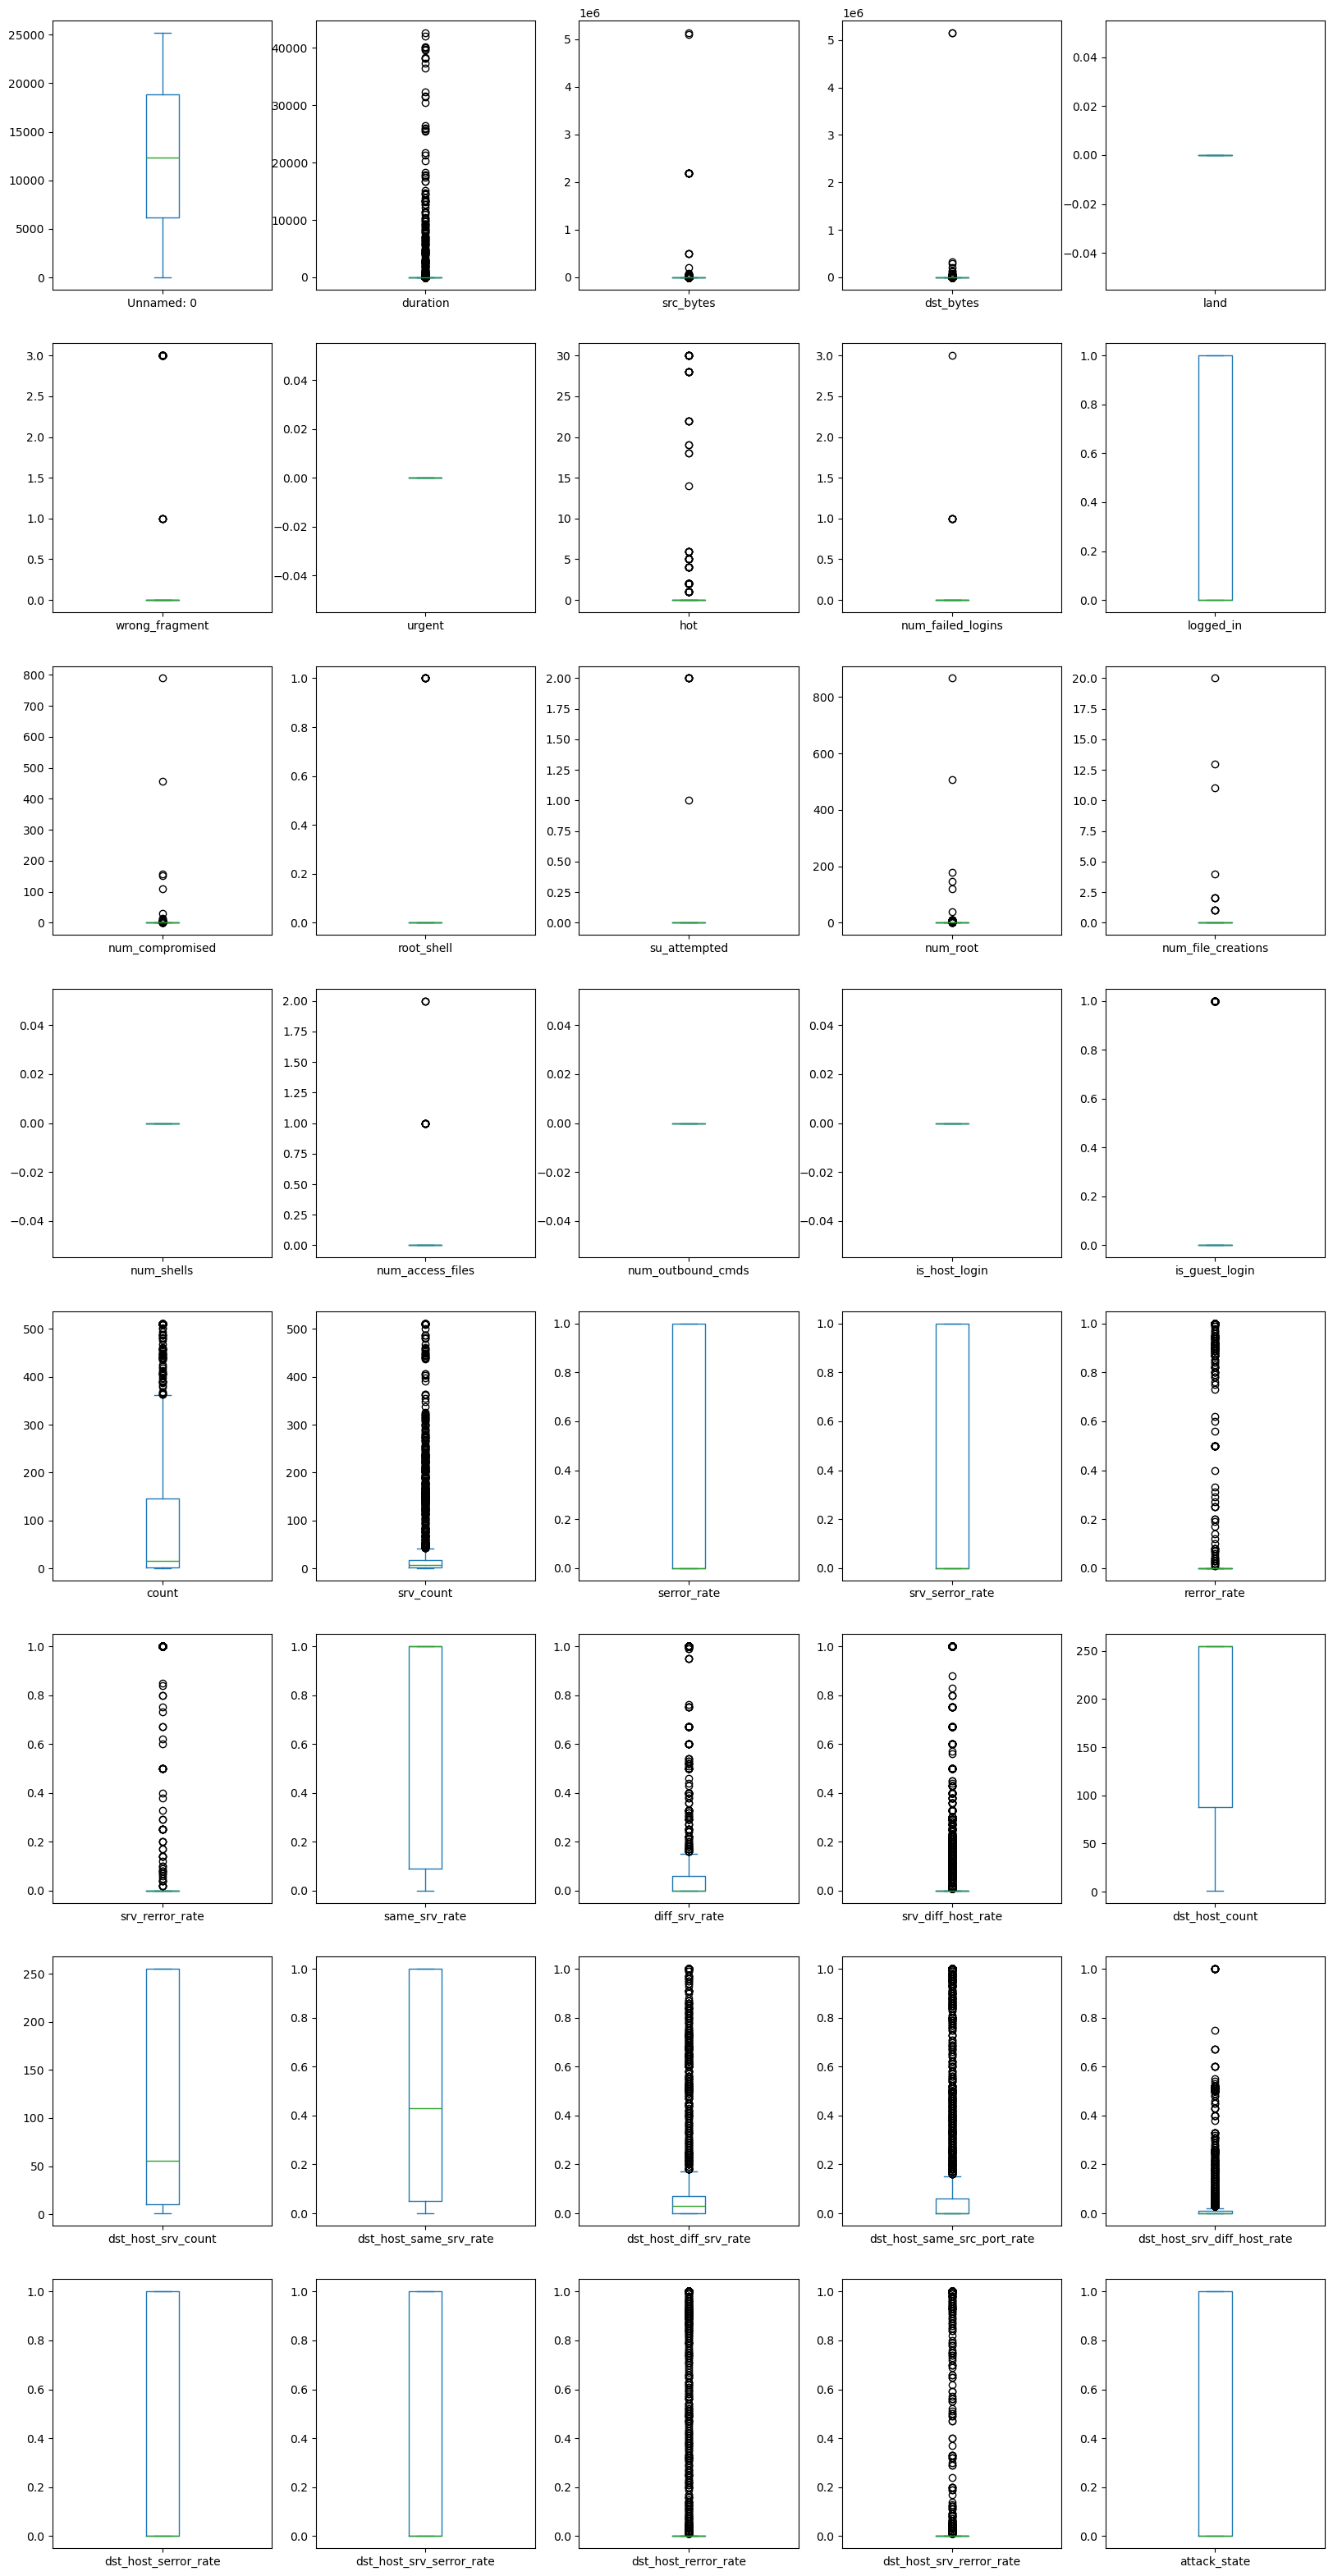

In [175]:
Tested_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [176]:
## Data Encoding
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [177]:
## Data Encoding
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [178]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['class'] = attack_LE.fit_transform(Trained_Data["class"])
Tested_Data['class'] = attack_LE.fit_transform(Tested_Data["class"])

In [179]:
Trained_Data

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,1,0,491,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,146,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,3,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,4,0,232,8153,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,5,0,199,420,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,25188,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
20151,25189,0,334,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
20152,25190,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
20153,25191,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [180]:
### Data Splitting
X_train = Trained_Data.drop('class', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('class', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [181]:
X_train

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,1,0,491,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,146,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,3,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,4,0,232,8153,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,5,0,199,420,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,25188,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
20151,25189,0,334,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
20152,25190,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
20153,25191,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [182]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

In [183]:
#### Data Scaling
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [184]:
X_train_train.shape, Y_train_train.shape

((15116, 120), (15116,))

In [185]:
X_test_train.shape, Y_test_train.shape

((5039, 120), (5039,))

In [186]:
X_train_test.shape, Y_train_test.shape

((3777, 117), (3777,))

In [187]:
X_test_test.shape, Y_test_test.shape

((1260, 117), (1260,))

In [188]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    #plot_roc_curve(Model_Abb, X_test, Y_test)

In [189]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

In [190]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8696083620005293, 0.8743798372692995)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.874

The Logistic Regression Model Sensitvity = 0.921

The Logistic Regression Model Precision  = 0.828

The Logistic Regression Model F1 Score   = 0.872

The Logistic Regression Model Recall     = 0.921

--------------------------------------------------



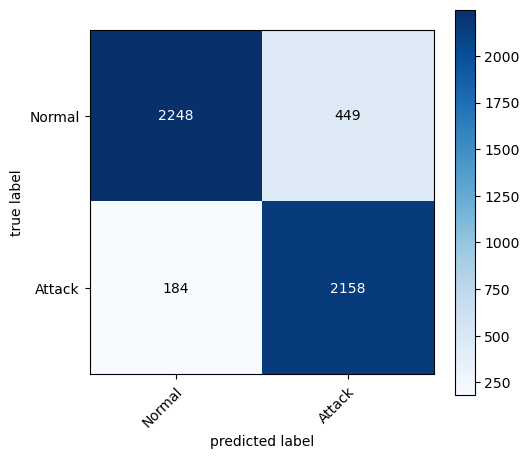

In [192]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

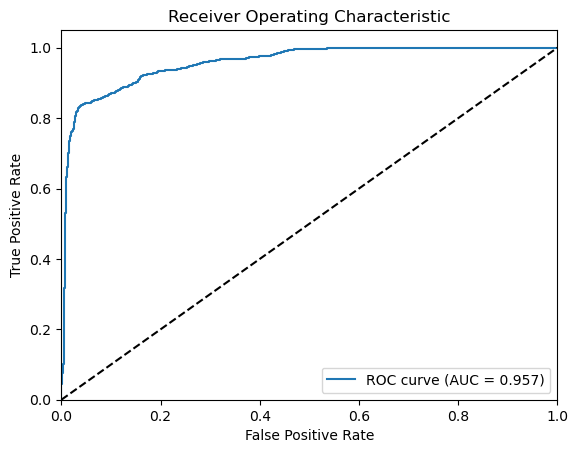

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your code for training the logistic regression model

# Get predicted probabilities for positive class
Y_prob = LR.predict_proba(X_test_train)[:, 1]

# Compute false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(Y_test_train, Y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [194]:
### Decision Tree
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [195]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.8887271765017201, 0.8892637428061123)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.889

The Decision Tree Classifier Model Sensitvity = 0.822

The Decision Tree Classifier Model Precision  = 0.932

The Decision Tree Classifier Model F1 Score   = 0.873

The Decision Tree Classifier Model Recall     = 0.822

--------------------------------------------------



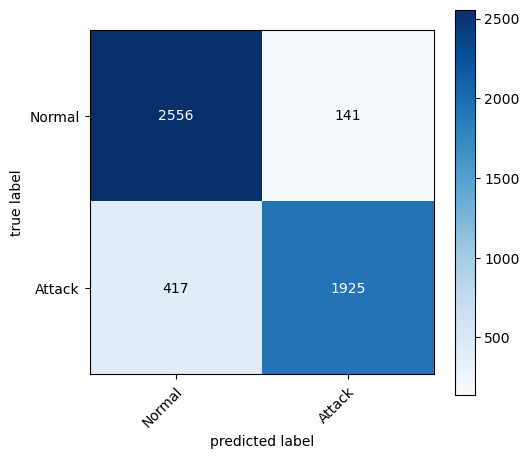

In [196]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

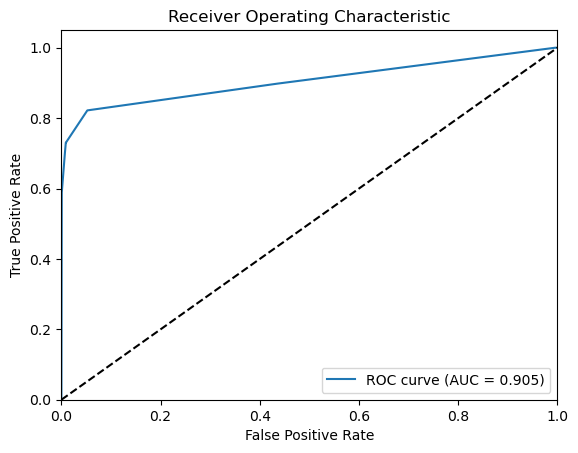

In [197]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your code for training the decision tree classifier model

# Get predicted probabilities for positive class
Y_prob = DT.predict_proba(X_test_train)[:, 1]

# Compute false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(Y_test_train, Y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[Text(0.5217391304347826, 0.9, 'x[21] <= -0.281\ngini = 0.498\nsamples = 15116\nvalue = [8063.0, 7053.0]'),
 Text(0.2391304347826087, 0.7, 'x[114] <= 0.5\ngini = 0.464\nsamples = 5264\nvalue = [3339, 1925]'),
 Text(0.3804347826086957, 0.8, 'True  '),
 Text(0.13043478260869565, 0.5, 'x[5] <= 0.5\ngini = 0.392\nsamples = 4514\nvalue = [3304, 1210]'),
 Text(0.08695652173913043, 0.3, 'x[32] <= 2.643\ngini = 0.391\nsamples = 4506\nvalue = [3304, 1202]'),
 Text(0.043478260869565216, 0.1, 'gini = 0.261\nsamples = 3461\nvalue = [2928, 533]'),
 Text(0.13043478260869565, 0.1, 'gini = 0.461\nsamples = 1045\nvalue = [376, 669]'),
 Text(0.17391304347826086, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.34782608695652173, 0.5, 'x[26] <= -0.137\ngini = 0.089\nsamples = 750\nvalue = [35, 715]'),
 Text(0.2608695652173913, 0.3, 'x[39] <= -0.5\ngini = 0.003\nsamples = 701\nvalue = [1, 700]'),
 Text(0.21739130434782608, 0.1, 'gini = 0.0\nsamples = 700\nvalue = [0, 700]'),
 Text(0.30434782608695

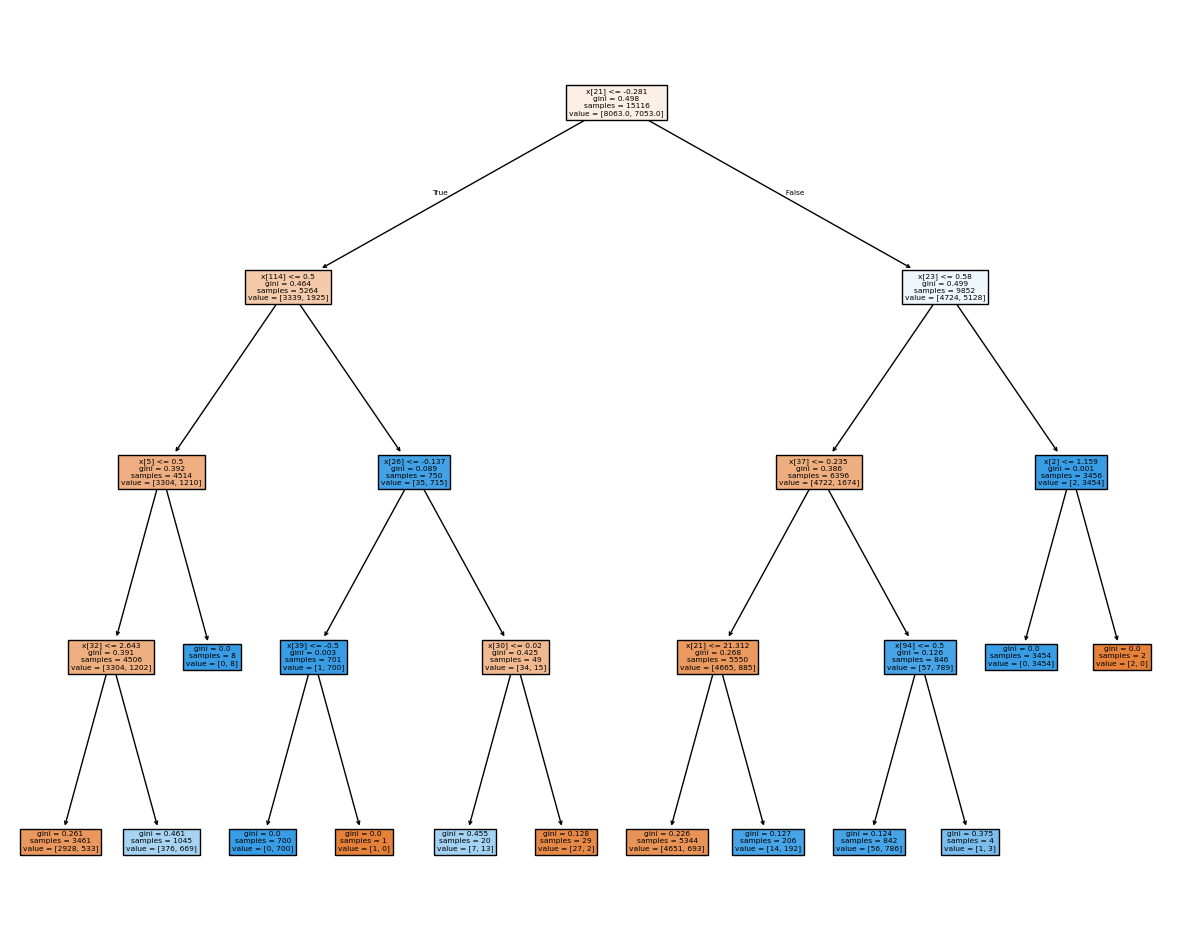

In [198]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

In [199]:
### Random Forest Classifier
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9]
    
Parameters={ 'max_depth': max_depth}

In [200]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=8)

In [201]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [202]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



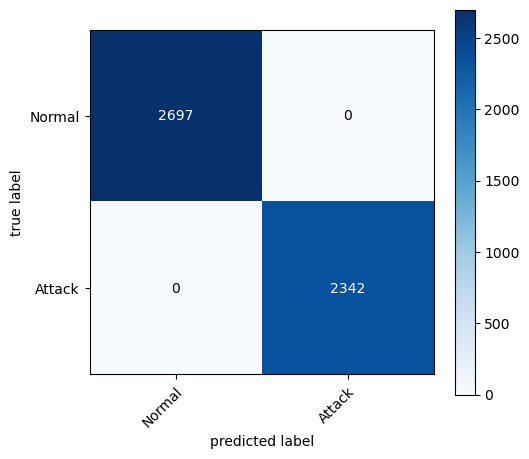

In [203]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

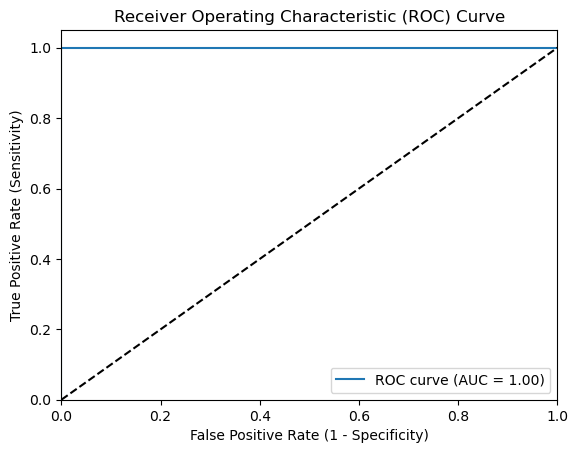

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the trained Random Forest Classifier model (RF) and the test data (X_test, Y_test)
y_pred_prob = RF.predict_proba(X_test_train)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test_train, y_pred_prob)
auc = roc_auc_score(Y_test_train, y_pred_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [205]:
#### KNN Model
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [206]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.990209050013231, 0.9872990672752531)

--------------------------------------------------

The KNN Model Accuracy   = 0.987

The KNN Model Sensitvity = 0.983

The KNN Model Precision  = 0.989

The KNN Model F1 Score   = 0.986

The KNN Model Recall     = 0.983

--------------------------------------------------



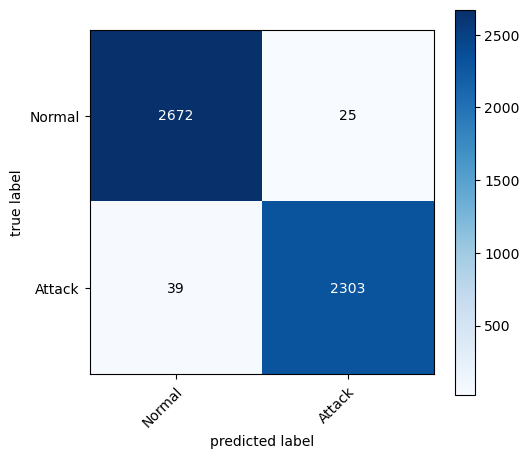

In [207]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

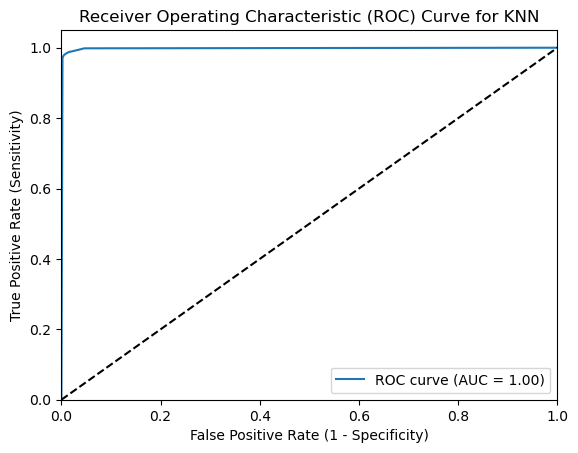

In [208]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the trained KNN model (KNN) and the test data (X_test_train, Y_test_train)
y_pred_prob = KNN.predict_proba(X_test_train)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test_train, y_pred_prob)
auc = roc_auc_score(Y_test_train, y_pred_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [209]:
#### SVM Classifier
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

LinearSVC(C=1)

In [210]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(1.0, 1.0)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 1.0

The SVM Linear SVC Kernel Model Sensitvity = 1.0

The SVM Linear SVC Kernel Model Precision  = 1.0

The SVM Linear SVC Kernel Model F1 Score   = 1.0

The SVM Linear SVC Kernel Model Recall     = 1.0

--------------------------------------------------



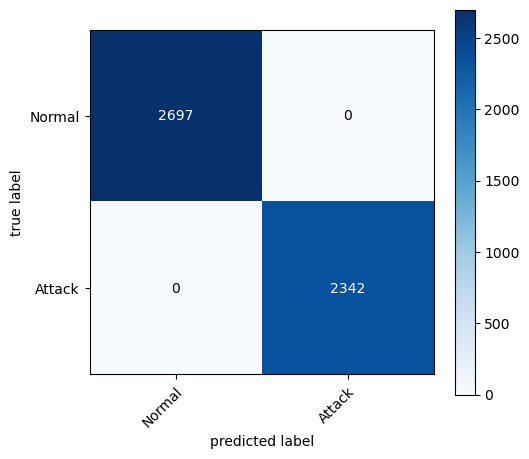

In [211]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)

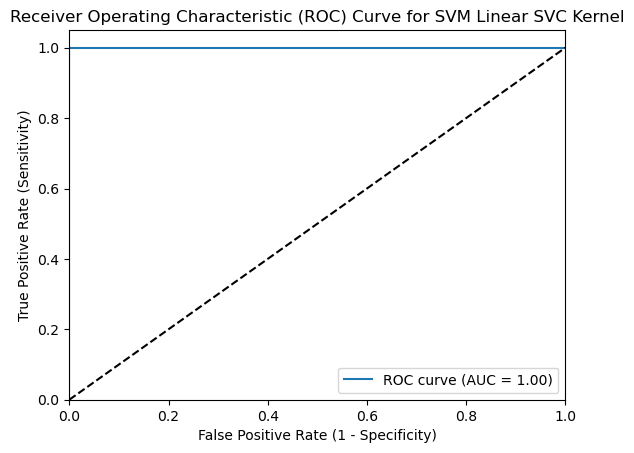

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the trained SVM Linear SVC Kernel model (Linear_SVC) and the test data (X_test_train, Y_test_train)
y_pred_prob = Linear_SVC.decision_function(X_test_train)  # Predicted decision scores
fpr, tpr, thresholds = roc_curve(Y_test_train, y_pred_prob)
auc = roc_auc_score(Y_test_train, y_pred_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Linear SVC Kernel')
plt.legend(loc="lower right")
plt.show()

In [327]:
Pred_Data = pd.read_csv(r'C:\Users\Eng Sacad\Desktop\IDS\Test_data_pred.csv')

In [329]:
Pred_Data

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,7,0,tcp,private,REJ,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0,0,1.00,1
1,6,0,tcp,private,S0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1,1,0.00,0
2,3,0,tcp,private,S0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1,1,0.00,0
3,77,0,tcp,netbios_ns,S0,0,0,0,0,0,...,255,2,0.01,0.06,0.00,0.00,1,1,0.00,0
4,45,0,tcp,http,SF,233,616,0,0,0,...,66,255,1.00,0.00,0.02,0.03,0,0,0.02,0
5,42,0,tcp,mtp,S0,0,0,0,0,0,...,255,2,0.01,0.06,0.00,0.00,1,1,0.00,0
6,14,0,tcp,private,S0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,1,1,0.00,0


In [331]:
## Data Encoding
Pred_Data = pd.get_dummies(Pred_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [333]:
# Reindex Pred_Data to match the column order of Trained_Data
Pred_Data = Pred_Data.reindex(columns=Trained_Data.columns.drop('class'), fill_value=0)

In [335]:
Pred_Data

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,7,0,0,0,0,0,0,0,0,0,...,True,0,0,0,False,0,0,0,False,0
1,6,0,0,0,0,0,0,0,0,0,...,False,0,0,0,True,0,0,0,False,0
2,3,0,0,0,0,0,0,0,0,0,...,False,0,0,0,True,0,0,0,False,0
3,77,0,0,0,0,0,0,0,0,0,...,False,0,0,0,True,0,0,0,False,0
4,45,0,233,616,0,0,0,0,0,1,...,False,0,0,0,False,0,0,0,True,0
5,42,0,0,0,0,0,0,0,0,0,...,False,0,0,0,True,0,0,0,False,0
6,14,0,0,0,0,0,0,0,0,0,...,False,0,0,0,True,0,0,0,False,0


In [337]:
# Predicting the class (anomaly or attack) using the trained model
predictions = Linear_SVC.predict(Pred_Data)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [339]:
# Convert the predicted values back to their original labels
predicted_classes = attack_LE.inverse_transform(predictions)

In [341]:
# Print the predicted classes
print(predicted_classes)

['normal' 'normal' 'normal' 'normal' 'anomaly' 'normal' 'normal']


In [345]:
# Attach predicted_classes as a column to Pred_Data
Pred_Data['predicted_class'] = predicted_classes

In [347]:
Pred_Data

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,predicted_class
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,False,0,0,0,False,0,normal
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,True,0,0,0,False,0,normal
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,True,0,0,0,False,0,normal
3,77,0,0,0,0,0,0,0,0,0,...,0,0,0,True,0,0,0,False,0,normal
4,45,0,233,616,0,0,0,0,0,1,...,0,0,0,False,0,0,0,True,0,anomaly
5,42,0,0,0,0,0,0,0,0,0,...,0,0,0,True,0,0,0,False,0,normal
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,True,0,0,0,False,0,normal
